# Regressor para estimação de vendas de Tv de acordo com investimento em publicidade


In [5]:
from matplotlib import pyplot as plt
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [10]:
import pandas as pd

In [25]:
from sklearn import preprocessing as prep

In [23]:
dataset = pd.read_csv('investimento_vendas_produto.csv',sep=';')

In [39]:
dataset.head()

,Investimento,vendas_do_produto
0,1000,550
1,1200,650
2,1350,600
3,1700,900
4,1900,800


In [132]:
dataset.describe()

,Investimento,vendas_do_produto
count,65.000000,65.000000
mean,10082.307692,4215.169231
std,5560.213229,2287.937155
min,1000.000000,550.000000
25%,5300.000000,2350.000000
50%,10000.000000,3855.000000
75%,14800.000000,6300.000000
max,19600.000000,8165.000000


In [135]:
dataset.isnull().sum()

Investimento         0
vendas_do_produto    0
dtype: int64

In [136]:
invetimentoPublicidade, tvsVendidas = dataset.iloc[:,0],dataset.iloc[:,1]

In [138]:
import numpy as np

a = np.array(invetimentoPublicidade)

In [140]:
a


array([ 1000,  1200,  1350,  1700,  1900,  2200,  2500,  2800,  3100,
        3500,  3800,  4000,  4300,  4500,  4800,  5000,  5300,  5500,
        5800,  6100,  6400,  6700,  7000,  7300,  7600,  7900,  8200,
        8500,  8800,  9100,  9400,  9700, 10000, 10300, 10600, 10900,
       11200, 11500, 11800, 12100, 12400, 12700, 13000, 13300, 13600,
       13900, 14200, 14500, 14800, 15100, 15400, 15700, 16000, 16300,
       16600, 16900, 17200, 17500, 17800, 18100, 18400, 18700, 19000,
       19300, 19600])

In [157]:
a[:-1].reshape(-1,4)

array([[ 1000,  1200,  1350,  1700],
       [ 1900,  2200,  2500,  2800],
       [ 3100,  3500,  3800,  4000],
       [ 4300,  4500,  4800,  5000],
       [ 5300,  5500,  5800,  6100],
       [ 6400,  6700,  7000,  7300],
       [ 7600,  7900,  8200,  8500],
       [ 8800,  9100,  9400,  9700],
       [10000, 10300, 10600, 10900],
       [11200, 11500, 11800, 12100],
       [12400, 12700, 13000, 13300],
       [13600, 13900, 14200, 14500],
       [14800, 15100, 15400, 15700],
       [16000, 16300, 16600, 16900],
       [17200, 17500, 17800, 18100],
       [18400, 18700, 19000, 19300]])

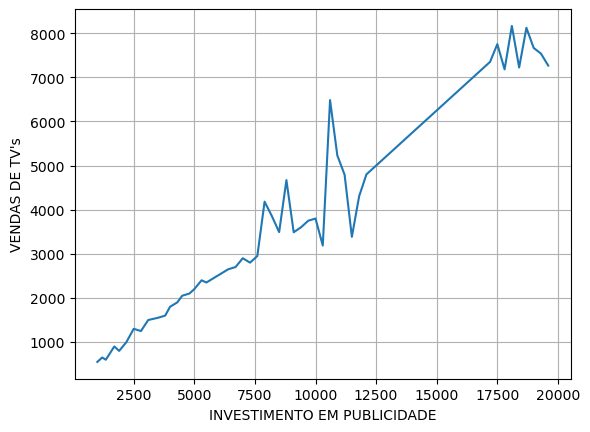

In [63]:
plt.plot(invetimentoPublicidade, tvsVendidas)
plt.xlabel("INVESTIMENTO EM PUBLICIDADE")
plt.ylabel("VENDAS DE TV's")
plt.grid()

In [64]:
corr = stats.pearsonr(invetimentoPublicidade, tvsVendidas)

In [50]:
corr

PearsonRResult(statistic=0.980051684922513, pvalue=6.329649177568891e-46)

In [71]:
coeficienteAngular, intercepto, r,p_valor, std_err = stats.linregress(invetimentoPublicidade, tvsVendidas)
 

In [123]:
print(f' Coeficiente de Angular(inclinação Slope): {coeficienteAngular} \n \
Coefiente Linear ou Intercepto: {intercepto}\n \
Correlação Pearson: {r}\n \
P-valor:{p_valor} \n \
Erro da Inclinação (gradiente): {std_err}')

 Coeficiente de Angular(inclinação Slope): 0.40327530097867637 
 Coefiente Linear ou Intercepto: 149.2235615942227
 Correlação Pearson: 0.9800516849225134
 P-valor:6.329649177565552e-46 
 Erro da Inclinação (gradiente): 0.010303238251617807


In [96]:
def estimador(valor):
    global coeficienteAngular, intercepto
    estimativa = coeficienteAngular*valor+intercepto
    return estimativa
    

In [159]:
estimador(28140)

11497.390531134175

In [99]:
valoresEstimados = list(map(estimador,invetimentoPublicidade))

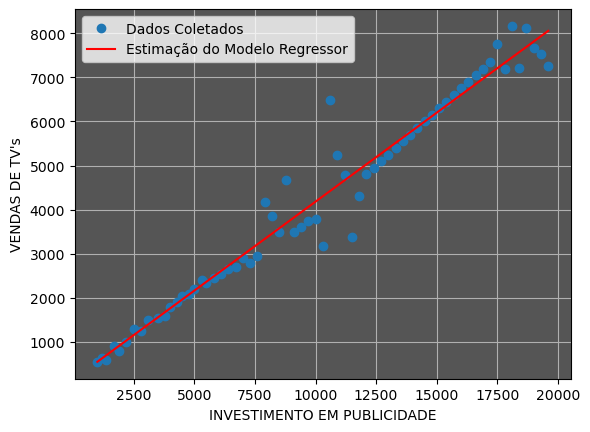

In [186]:
ax =plt.axes()
ax.set_facecolor('#555')
plt.plot(invetimentoPublicidade, tvsVendidas,'o',label='Dados Coletados')     #plota valores reais
plt.plot(invetimentoPublicidade,valoresEstimados,color='r',label="Estimação do Modelo Regressor") #plotar curva estimada
plt.legend()
plt.xlabel("INVESTIMENTO EM PUBLICIDADE")
plt.ylabel("VENDAS DE TV's")
plt.grid()



In [174]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [173]:
r2_score(tvsVendidas,valoresEstimados) #Coeficiente de determinação (R²) varia de 0 a 1, e indica o quanto da variabilidade dos dados foi explicada pelo modelo, que nesse3 cao foi 96%

0.9605013051194576

In [175]:
print('MAE: %.2f' % mean_absolute_error(tvsVendidas,valoresEstimados))

MAE: 269.25


In [176]:
print('MSE - Erro medio quadrado: %.2f' % mean_squared_error(tvsVendidas,valoresEstimados))

MSE - Erro medio quadrado: 203581.14


In [179]:
rmse = (mean_squared_error(tvsVendidas,valoresEstimados))**(0.5)
print('RMSE - Raiz do Erro medio quadrado: %.2f' %(rmse))

RMSE - Raiz do Erro medio quadrado: 451.20
